#Library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import classification_report, accuracy_score,roc_curve, auc, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten,Activation
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import plotly.express as px

#Loading data


In [ ]:
path_o="/content/drive/MyDrive/dissertation/data.csv"

In [ ]:
data_o=pd.read_csv(path_o)

In [ ]:
data_o.shape

(286, 50)

In [ ]:
#Deleting the extra rows
data_o=data_o.drop(index=[i for i in range(268,286)])

In [ ]:
data_o.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

In [ ]:
data_o['DepSev'].unique()

array(['Min', 'Mild', 'Mod', 'ModSev', 'Sev'], dtype=object)

In [ ]:
data_o.head(7)

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
5,Inter,SEA,Male,Grad,24.0,4.0,6.0,Long,3.0,Average,...,Yes,No,No,No,No,No,No,Yes,No,No
6,Inter,SA,Male,Grad,23.0,4.0,1.0,Short,3.0,Average,...,Yes,Yes,No,No,No,Yes,No,No,No,No


In [ ]:
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   Region           268 non-null    object 
 2   Gender           268 non-null    object 
 3   Academic         268 non-null    object 
 4   Age              268 non-null    float64
 5   Age_cate         268 non-null    float64
 6   Stay             268 non-null    float64
 7   Stay_Cate        268 non-null    object 
 8   Japanese         268 non-null    float64
 9   Japanese_cate    268 non-null    object 
 10  English          268 non-null    float64
 11  English_cate     268 non-null    object 
 12  Intimate         260 non-null    object 
 13  Religion         268 non-null    object 
 14  Suicide          268 non-null    object 
 15  Dep              268 non-null    object 
 16  DepType          268 non-null    object 
 17  ToDep           

##ENCODING THE LABELS

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data_o['DepSev'] = label_encoder.fit_transform(data_o['DepSev'])
depsev_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
for label, number in depsev_mapping.items():
  print(label , number)

Mild 0
Min 1
Mod 2
ModSev 3
Sev 4


In [ ]:
#Doing for all the Columns
for i in data_o.select_dtypes(include=['object']).columns:
  data_o[i]=label_encoder.fit_transform(data_o[i])

In [ ]:
data_o.head()

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,1,4,1,0,24.0,4.0,5.0,0,3.0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,4,1,0,28.0,5.0,1.0,2,4.0,1,...,1,1,0,0,0,0,0,0,0,0
2,1,4,1,0,25.0,4.0,6.0,0,4.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,29.0,5.0,1.0,2,2.0,2,...,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,28.0,5.0,1.0,2,1.0,2,...,1,1,0,1,0,1,1,0,0,0


In [ ]:
data_o.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

In [ ]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
data_o['AgeGroup'] = pd.cut(data_o['Age'], bins=bins, labels=labels, right=False)
age_group_counts = data_o['AgeGroup'].value_counts().sort_index()
fig = px.pie(age_group_counts, values=age_group_counts.values, names=age_group_counts.index, title='Age Group Distribution')
fig.update_layout(height=400, width=400)
fig.show()


In [ ]:
data_o=data_o.drop('AgeGroup',axis=1)

In [ ]:
gender_counts = data_o['Gender'].value_counts()
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, title='Gender Distribution')
fig.update_layout(height=400, width=400)
fig.show()

In [ ]:
# sns.pairplot(data_o)

In [ ]:
data_o.sample(10)

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
246,0,1,0,1,24.0,4.0,5.0,0,5.0,1,...,0,1,0,1,0,0,0,0,0,0
87,1,0,1,1,19.0,2.0,1.0,2,2.0,2,...,1,1,0,1,1,1,0,0,0,1
146,1,3,1,1,24.0,4.0,1.0,2,3.0,0,...,0,0,0,0,0,0,0,0,0,0
26,1,4,0,0,30.0,5.0,2.0,1,3.0,0,...,0,1,0,1,1,1,1,0,0,1
97,1,3,1,1,20.0,2.0,1.0,2,2.0,2,...,1,1,1,1,1,1,1,1,1,1
126,1,2,1,1,19.0,2.0,1.0,2,4.0,1,...,1,0,0,1,1,1,0,0,0,0
114,1,3,0,1,23.0,4.0,3.0,1,3.0,0,...,0,1,1,1,1,1,1,0,0,1
202,0,1,0,1,18.0,1.0,1.0,2,5.0,1,...,0,0,0,0,0,0,0,0,0,0
241,0,1,0,1,20.0,2.0,3.0,1,5.0,1,...,1,1,1,0,0,0,0,0,0,0
10,1,2,0,0,28.0,5.0,1.0,2,1.0,2,...,0,1,1,0,0,0,0,0,1,0


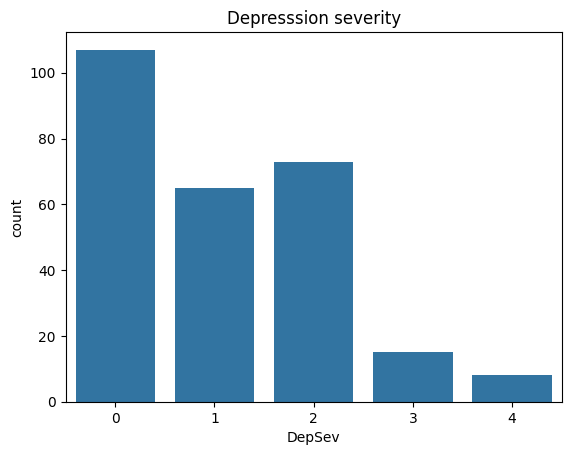

In [ ]:
sns.countplot(x='DepSev',data=data_o).set_title("Depresssion severity")
plt.show()

In [ ]:
X = data_o.drop('DepSev', axis=1)
y = data_o['DepSev']


In [ ]:
def correlation(X,y, threshold):

  data_combined = pd.concat([X, y], axis=1)
  correlation_matrix = data_combined.corr()
  correlation_with_target = correlation_matrix['DepSev'].drop('DepSev')
  selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index
  return selected_features

In [ ]:
threshold=[0.1,0.2]

In [ ]:
selected_features_dict=dict()

In [ ]:
for i in threshold:
  selected_features=correlation(X,y,i)
  selected_features_dict[i]=selected_features

In [ ]:
selected_features_dict[0.2]

Index(['Suicide', 'Dep', 'DepType', 'ToDep', 'ToSC', 'Afear', 'Alone',
       'Alone_bi'],
      dtype='object')

In [ ]:
s_1=X[selected_features_dict[0.1]]

In [ ]:
s_2=X[selected_features_dict[0.2]]

In [ ]:
data_combined = pd.concat([X, y], axis=1)
correlation_matrix = data_combined.corr()

In [ ]:
correlation_matrix["DepSev"]

,DepSev
inter_dom,-0.048034
Region,-0.046650
Gender,0.019337
Academic,0.071814
Age,-0.038259
Age_cate,0.009102
Stay,0.138771
Stay_Cate,-0.114361
Japanese,0.018772
Japanese_cate,0.015930


In [ ]:
s_1.shape

(268, 20)

In [ ]:
s_2.shape

(268, 8)

<Axes: >

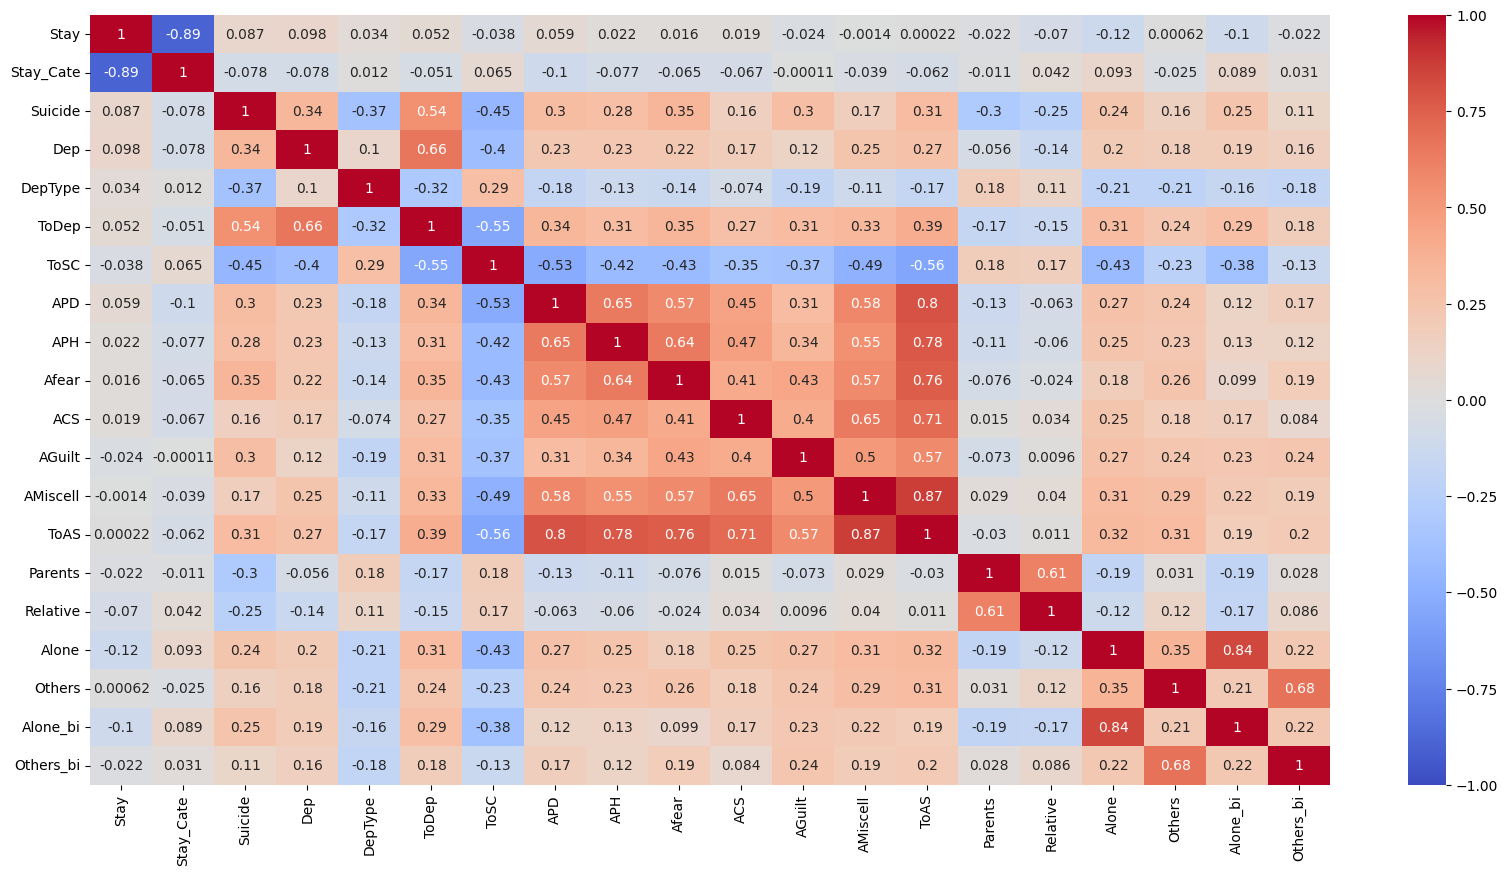

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(s_1.corr(),vmin=-1,cmap='coolwarm',annot=True)

<Axes: >

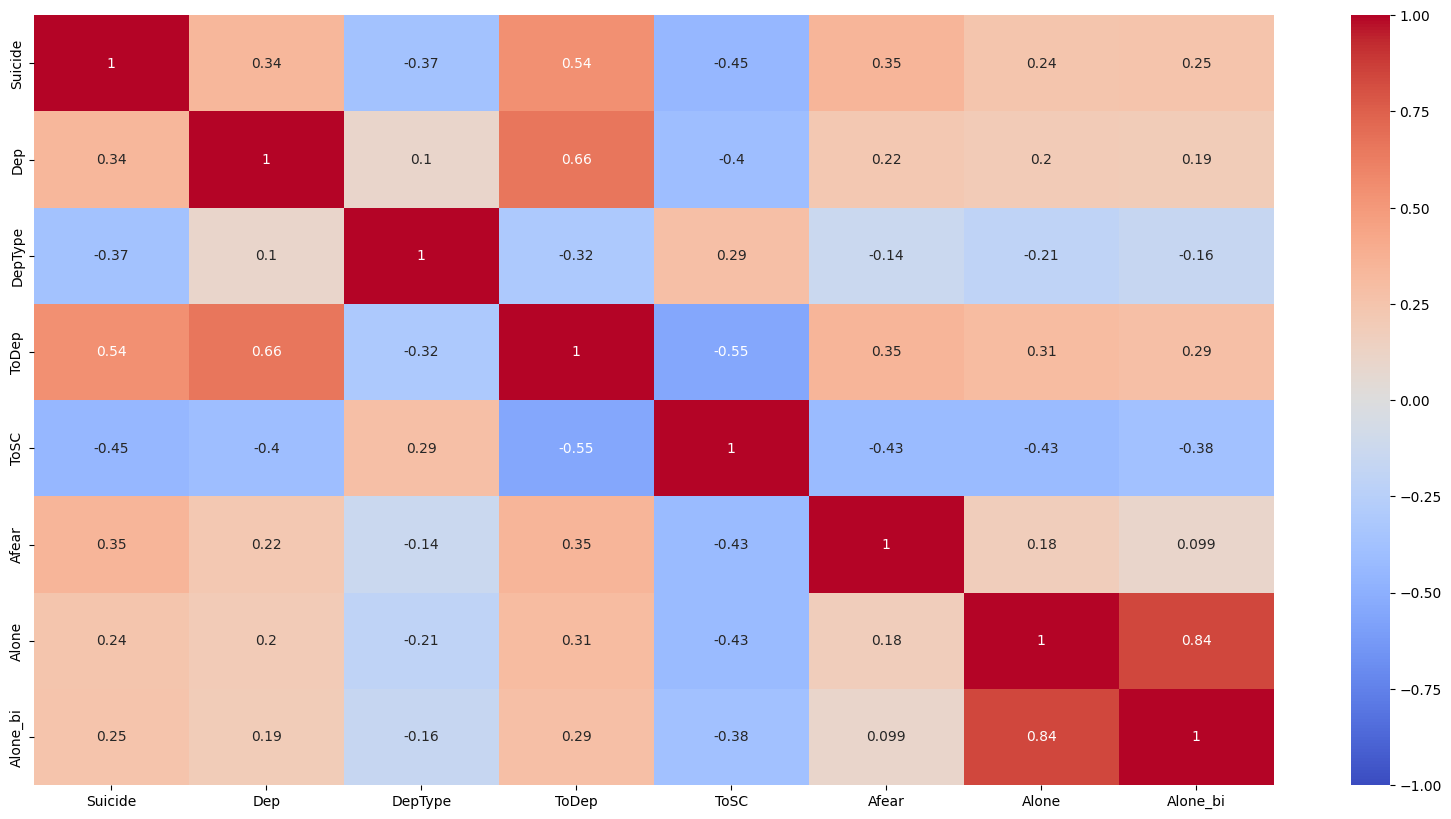

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(s_2.corr(),vmin=-1,cmap='coolwarm',annot=True)

#Spliting for training and testing

In [ ]:
X_1=s_1
X_2=s_2
y=data_o["DepSev"]

In [ ]:
X_1.shape,X_2.shape

((268, 20), (268, 8))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.3,random_state=42)

In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_2,y,test_size=0.3,random_state=42)

In [ ]:
X_train_1.shape

(187, 8)

In [ ]:
X_train.shape

(187, 20)

In [ ]:
y_test.shape

(81,)

###Threshold-0.1

In [ ]:
model= RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

In [ ]:
model_1=model.fit(X_train,y_train)

In [ ]:
rf_train_predict = model_1.predict(X_train)

In [ ]:
rf_test_predict=model_1.predict(X_test)

In [ ]:
rf_test_ac=accuracy_score(y_test, rf_test_predict)

In [ ]:
rf_train_accuracy=accuracy_score(rf_train_predict,y_train)
print("Training accuracy score of random forest",round(rf_train_accuracy*100,2),'%')

Training accuracy score of random forest 100.0 %


In [ ]:
print("The accuray of the random forest model: ",rf_test_ac*100)

The accuray of the random forest model:  92.5925925925926


In [ ]:
re=classification_report(y_test,rf_test_predict, zero_division=1)

In [ ]:
print(classification_report(y_test,rf_test_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      1.00      1.00        24
           2       0.85      0.92      0.88        24
           3       1.00      0.20      0.33         5
           4       1.00      1.00      1.00         1

    accuracy                           0.93        81
   macro avg       0.96      0.82      0.84        81
weighted avg       0.93      0.93      0.91        81



In [ ]:
rf_test_proba = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,rf_test_proba, multi_class='ovo', average='macro')

In [ ]:
print("AUC-ROC Score: ", auc)

AUC-ROC Score:  0.9898456790123458


###Threshold-0.2

In [ ]:
model_2=model.fit(X_train_1,y_train_1)

In [ ]:
rf_test_predict_1=model_2.predict(X_test_1)

In [ ]:
ac_1=accuracy_score(y_test, rf_test_predict_1)
# print("Classification Report:\n", classification_report(y_test, rf_test_predict))

In [ ]:
print("Classification Report:\n", classification_report(y_test, rf_test_predict_1))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      1.00      1.00        24
           2       0.92      0.92      0.92        24
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         1

    accuracy                           0.95        81
   macro avg       0.97      0.90      0.93        81
weighted avg       0.95      0.95      0.95        81



In [ ]:
print("The accuray of the random forest model: ",ac_1*100)

The accuray of the random forest model:  95.06172839506173


In [ ]:
rf_test_proba_1 = model.predict_proba(X_test_1)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_1 = roc_auc_score(y_test,rf_test_proba_1, multi_class='ovo', average='macro')

In [ ]:
print("AUC-ROC Score: ", auc_1)

AUC-ROC Score:  0.9956250000000001


#Neural Network

###Threshold-0.1

In [ ]:
model_nn=Sequential()
model_nn.add(Dense(24,input_dim=20))
model_nn.add(Activation("relu"))

model_nn.add(Dense(16))
model_nn.add(Activation("relu"))

model_nn.add(Dense(8))
model_nn.add(Activation("relu"))

model_nn.add(Dense(5))
model_nn.add(Activation("softmax"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model_nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,085 (4.24 KB)

 Trainable params: 1,085 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_nn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model_nn.fit(X_train,y_train,epochs=20)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0605 - loss: 5.9957
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0522 - loss: 4.7257  
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1141 - loss: 2.9341  
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2117 - loss: 2.3818  
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2617 - loss: 1.7368  
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2943 - loss: 1.5776  
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3436 - loss: 1.5630 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4065 - loss: 1.5149  
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4065 - loss: 1.5122 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3864 - loss: 1.4925  
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3514 - loss: 1.4928  
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3427 - loss: 1.

In [ ]:
y_pred_prob_nn = model_nn.predict(X_test)
y_pred_nn = np.argmax(y_pred_prob_nn, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
print(classification_report(y_test, y_pred_nn, zero_division=1))

              precision    recall  f1-score   support

           0       0.30      0.22      0.26        27
           1       0.78      0.75      0.77        24
           2       0.50      0.25      0.33        24
           3       0.08      0.40      0.13         5
           4       1.00      0.00      0.00         1

    accuracy                           0.40        81
   macro avg       0.53      0.32      0.30        81
weighted avg       0.50      0.40      0.42        81



In [ ]:
loss,accuracy2=model_nn.evaluate(X_test,y_test,verbose=0)
print("test accuracy",round(accuracy2*100,2),"%")

test accuracy 39.51 %


###Threshold-0.2

In [ ]:
model_nn=Sequential()
model_nn.add(Dense(24,input_dim=8))
model_nn.add(Activation("relu"))

model_nn.add(Dense(16))
model_nn.add(Activation("relu"))

model_nn.add(Dense(8))
model_nn.add(Activation("relu"))

model_nn.add(Dense(5))
model_nn.add(Activation("softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model_nn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 24)                  │             216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_35 (Activation)           │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 797 (3.11 KB)

 Trainable params: 797 (3.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_nn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model_nn.fit(X_train_1,y_train_1,epochs=20)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0425 - loss: 6.1113
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0462 - loss: 3.7318  
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0923 - loss: 2.3176 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4188 - loss: 1.8662 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4268 - loss: 1.7949 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4543 - loss: 1.4660 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4480 - loss: 1.3947 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4747 - loss: 1.3243 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4377 - loss: 1.3174  
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4654 - loss: 1.2644
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4867 - loss: 1.2142  
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5137 - loss: 1.1886

In [ ]:
y_pred_prob_nn = model_nn.predict(X_test_1)
y_pred_nn = np.argmax(y_pred_prob_nn, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [ ]:
print(classification_report(y_test, y_pred_nn, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61        27
           1       0.95      0.79      0.86        24
           2       0.50      0.38      0.43        24
           3       1.00      0.00      0.00         5
           4       1.00      1.00      1.00         1

    accuracy                           0.62        81
   macro avg       0.79      0.59      0.58        81
weighted avg       0.67      0.62      0.60        81



In [ ]:
loss,accuracy2=model_nn.evaluate(X_test_1,y_test_1)
print("test accuracy",round(accuracy2*100,2),"%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6133 - loss: 0.9753
test accuracy 61.73 %


#SVM

###Threshold-0.1

In [ ]:
svm_model = SVC(random_state=42,class_weight='balanced')

In [ ]:
svm_model.fit(X_train,y_train)
accuracy=svm_model.score(X_test,y_test)

In [ ]:
print(accuracy*100)

43.20987654320987


In [ ]:
svm_test_pred=svm_model.predict(X_test)

In [ ]:
print(classification_report(y_test, svm_test_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.26      0.34        27
           1       0.60      0.75      0.67        24
           2       0.30      0.38      0.33        24
           3       0.14      0.20      0.17         5
           4       1.00      0.00      0.00         1

    accuracy                           0.43        81
   macro avg       0.51      0.32      0.30        81
weighted avg       0.45      0.43      0.42        81



###Threshold-0.2

In [ ]:
svm_model = SVC(random_state=42,class_weight='balanced')
svm_model.fit(X_train_1,y_train_1)
accuracy=svm_model.score(X_test_1,y_test_1)
print(accuracy*100)
svm_test_pred_1=svm_model.predict(X_test_1)

67.90123456790124


In [ ]:
print(classification_report(y_test, svm_test_pred_1, zero_division=1))

              precision    recall  f1-score   support

           0       0.62      0.78      0.69        27
           1       0.88      0.96      0.92        24
           2       0.62      0.33      0.43        24
           3       0.38      0.60      0.46         5
           4       1.00      0.00      0.00         1

    accuracy                           0.68        81
   macro avg       0.70      0.53      0.50        81
weighted avg       0.69      0.68      0.66        81



#Voting classifier

In [ ]:
voting_clf = VotingClassifier(estimators=[('rf', model), ('svm',svm_model)], voting='soft')

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('svm',
                              SVC(class_weight='balanced', random_state=42))],
                 voting='soft')

In [ ]:
accuracy_2= accuracy_score(rf_test_predict, svm_test_pred)
print(f'Ensemble Model Accuracy: {accuracy_2*100}')

Ensemble Model Accuracy: 46.913580246913575
